In [1]:
import tensorflow as tf 

In [2]:
# Loading -MNIST data set
#It contains Training samples- 60,000; Testing samples- 10,000
#Tensorflow contains MNIST dataset which can be loaaded using Keras


In [3]:
mnist= tf.keras.datasets.mnist #this is basically handwritten characters based on 28X28 sized images of 0 to 9

In [4]:
#After loading the MNIST data, divide into train and test datsets
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape #says that the training dataset has 60000 images of size 28*28


(60000, 28, 28)

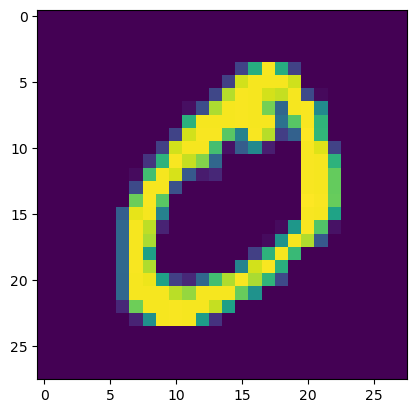

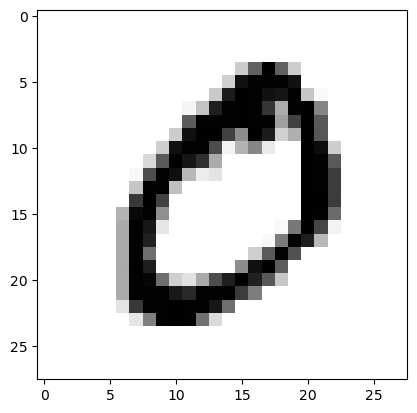

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()#in order to execute the graph
#however we dont know whether its color image or binary image
#so in order to plot it we change the configuration

plt.imshow(x_train[1],cmap=plt.cm.binary)


In [7]:
#Checking the values of each pixel
#Before normalization
#black- near to 0; near to 255 is the white colour; middle colours r of grey
print(x_train[1])

#but actually inside the compiler the number is expressed in black colour and the background is given as white
#since we have converted it into binary it is reverted


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

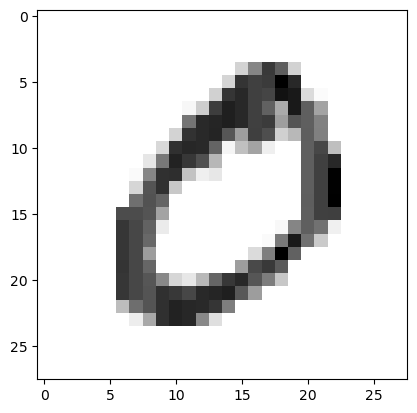

In [8]:
#As images are in gray level(0 to 255 range)
#Preprocessing of the data
#normalization is nothing but x_train/255; we have built in command for normalization hence we use it
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[1],cmap=plt.cm.binary)


In [9]:
#After normalization
print(x_train[1])#all values are between 0 and 1


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
#lets verify if the dataset values are attached with the correct labels
print(y_train[1])

0


In [11]:
#Resizing the image to make it suitable for applying the convolution operation
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increasing one dimension for kernel operation
x_testr= np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) #increasing one dimension for kernel operation
print("Training sample dimension is:",x_trainr.shape)
print("Testing sample dimension is:",x_testr.shape)

Training sample dimension is: (60000, 28, 28, 1)
Testing sample dimension is: (10000, 28, 28, 1)


In [12]:
#Creating the deep neural network
#Training on 60000 samples of MNIST handwritten dataset

from tensorflow.keras.models import Sequential #Sequential is used to arrange the layers of DNN in sequence
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D,MaxPooling2D #These are the layers



In [13]:
#Creating a neural network model

model=Sequential()

#First convolutional layer
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))#only for first convolutional layer to mention the input size
model.add(Activation("relu"))#activation function to make it non linear
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling single maximum is 2X2

#2nd Convolutional layer
model.add(Conv2D(64,(3,3)))#2nd convolutional layer
model.add(Activation("relu"))#activation function
model.add(MaxPooling2D(pool_size=(2,2)))#Maxpooling

#3rd Convolutional layer
model.add(Conv2D(64,(3,3)))#3rd convolutional layer
model.add(Activation("relu"))#activation function
model.add(MaxPooling2D(pool_size=(2,2)))#Maxpooling

#Fully Connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

#Last fully connected layer
model.add(Dense(10))#this last dense layer must be equal to 10
model.add(Activation("softmax"))#activation function is changed to softmax

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

In [15]:
print("Total Training Samples:",len(x_trainr))

Total Training Samples: 60000


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

In [17]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)#Training my model

Epoch 1/5


1313/1313 [==============================] - 35s 23ms/step - loss: 0.3083 - accuracy: 0.9023 - val_loss: 0.1361 - val_accuracy: 0.9563
Epoch 2/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0988 - accuracy: 0.9697 - val_loss: 0.0872 - val_accuracy: 0.9736
Epoch 3/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0706 - accuracy: 0.9779 - val_loss: 0.0813 - val_accuracy: 0.9746
Epoch 4/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0648 - val_accuracy: 0.9804
Epoch 5/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0473 - accuracy: 0.9849 - val_loss: 0.0707 - val_accuracy: 0.9798


In [18]:
#Evaluating on testing dataset MNIST
test_loss, test_acc= model.evaluate(x_testr,y_test)
print("Test loss on 10000 test samples",test_loss)
print("Validation accuracy on 10000 test samples",test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0672 - accuracy: 0.9796
Test loss on 10000 test samples 0.06723202764987946
Validation accuracy on 10000 test samples 0.9796000123023987


In [19]:
#predictions = new_model.predict([x_test])
#there is a specialized method for efficiently saving your model, to name all inputs
#therefore instead of unsign new model loaded, for now only for predictions we are using a simple model
predictions=model.predict([x_testr])


313/313 [==============================] - 3s 8ms/step


In [20]:
print(predictions)

[[1.98314137e-06 1.00264415e-05 2.22759554e-04 ... 9.99737322e-01
  4.00403678e-07 1.60248965e-05]
 [4.11127303e-06 8.70068470e-06 9.99913573e-01 ... 1.29431373e-06
  4.75979505e-06 2.65065665e-07]
 [1.02070885e-06 9.99973536e-01 3.78074424e-06 ... 4.38450161e-06
  1.98076691e-06 8.44675128e-07]
 ...
 [1.37160711e-07 6.59924190e-05 1.56788406e-06 ... 9.43152770e-07
  6.65179925e-07 1.52390712e-05]
 [2.46429754e-05 7.22128846e-09 2.28030395e-08 ... 1.93041060e-07
  1.69763691e-04 6.89429580e-05]
 [5.01662260e-04 9.89232831e-07 1.77608788e-04 ... 1.75445666e-06
  6.12106349e-04 1.58836832e-04]]


In [21]:
print(np.argmax(predictions[0]))#class probability value

7


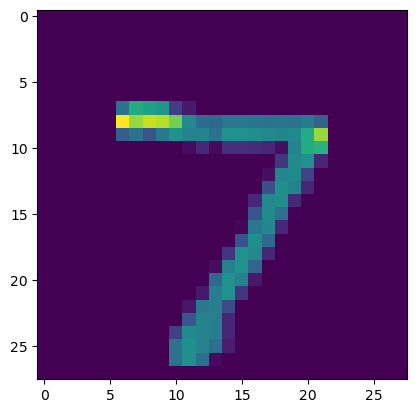

In [22]:
#now to check if our answer is true or no
plt.imshow(x_test[0])

In [23]:
print(np.argmax(predictions[128]))

8


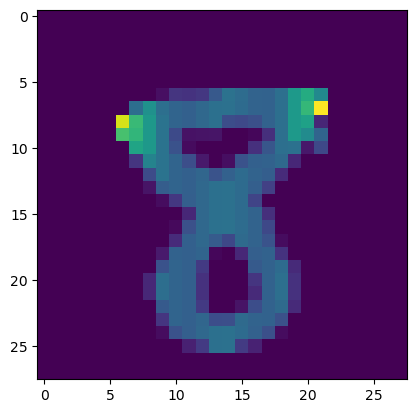

In [24]:
plt.imshow(x_test[128])#randomly we r checking if our prediction is right or wrong

In [25]:
pip install opencv-python


In [26]:
import cv2

In [27]:
img=cv2.imread('9.jpg')

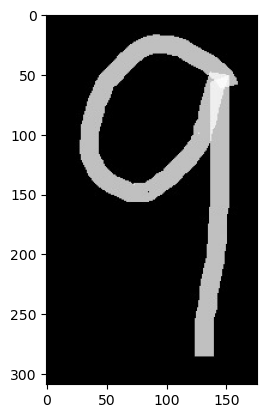

In [28]:
plt.imshow(img)

In [29]:
#Convert the given image into grey image
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape 

(309, 176)

In [31]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [32]:
resized.shape#converted into 28X28 size

(28, 28)

In [33]:
newimg=tf.keras.utils.normalize(resized,axis=1) #normalizing

In [34]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) #KERNEL OPERATION OF CONVOLUTION LAYER

In [35]:
newimg.shape

(1, 28, 28, 1)

In [36]:
predictions=model.predict(newimg)

1/1 [==============================] - 0s 221ms/step


In [37]:
print(np.argmax(predictions))

9
